This notebook shows effects of large-scale error on the radio-to-optical offset.

In [1]:
from astropy.table import Table #, join, Column
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [2]:
pos_oft_sx = Table.read("../data/gedr3_icrf3sx_combined.fits")
pos_oft_k = Table.read("../data/gedr3_icrf3k_combined.fits")
pos_oft_xka = Table.read("../data/gedr3_icrf3xka_combined.fits")

Functions defined for plot.

I put them in the beginning part since it would be convenient for me to compare different plots.

In [3]:
def compare_pos_oft(pos_oft_sx, label, ymin=0, ymax=16):
    """
    """

    # Histogram of dra and ddec
    fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5),
          (ax6, ax7), (ax8, ax9)) = plt.subplots(
        figsize=(6, 6), ncols=2, nrows=5, sharex=True, sharey=True)

    # n_bins = 25
    bins_set = np.linspace(-2, 2, 50)

    # Weights to calculate the per cent
    wgt = 100 / len(pos_oft_sx) * np.ones_like(pos_oft_sx["ra"])

    # Plot
    # R.A. difference
    # SX - Gaia
    ax0.hist(pos_oft_sx["dra"], bins_set, histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, all sources)
    ax2.hist(pos_oft_sx["dra_all"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, clean sources)
    ax4.hist(pos_oft_sx["dra_cln"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, common sources)
    ax6.hist(pos_oft_sx["dra_com"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, common clean sources)
    ax8.hist(pos_oft_sx["dra_ccl"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # Decl. difference
    # SX - Gaia
    ax1.hist(pos_oft_sx["ddec"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, all sources)
    ax3.hist(pos_oft_sx["ddec_all"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, clean sources)
    ax5.hist(pos_oft_sx["ddec_cln"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, common sources)
    ax7.hist(pos_oft_sx["ddec_com"], bins_set,
             histtype="step", fill=False, weights=wgt)

    # SX - Gaia (adjusted by vsh02, clean sources)
    ax9.hist(pos_oft_sx["ddec_ccl"], bins_set,
             histtype="step", fill=False, weights=wgt)

    ymin, ymax = 0, 16
    ax0.set_ylim([ymin, ymax])

    # Vetical lines
    ax0.vlines(0, ymin, ymax, "r", lw=0.5)
    ax1.vlines(0, ymin, ymax, "r", lw=0.5)
    ax2.vlines(0, ymin, ymax, "r", lw=0.5)
    ax3.vlines(0, ymin, ymax, "r", lw=0.5)
    ax4.vlines(0, ymin, ymax, "r", lw=0.5)
    ax5.vlines(0, ymin, ymax, "r", lw=0.5)
    ax6.vlines(0, ymin, ymax, "r", lw=0.5)
    ax7.vlines(0, ymin, ymax, "r", lw=0.5)
    ax8.vlines(0, ymin, ymax, "r", lw=0.5)
    ax9.vlines(0, ymin, ymax, "r", lw=0.5)

    ax0.set_ylabel("% (Original)")
    ax2.set_ylabel("% (all)")
    ax4.set_ylabel("% (clean)")
    ax6.set_ylabel("% (common)")
    ax8.set_ylabel("% (comcln)")

    ax8.set_xlabel("$\Delta\\alpha\cos\delta$ ({}, mas)".format(label), fontsize=12)
    ax8.xaxis.set_minor_locator(MultipleLocator(0.2))

    ax9.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax9.set_xlabel("$\Delta\delta$ ({}, mas)".format(label), fontsize=12)

    plt.tight_layout()

In [4]:
def compare_pos_oft_4_4_bands(pos_oft_sx, pos_oft_k, pos_oft_xka):

    # Histogram of dra and ddec
    fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(
        figsize=(6, 6), ncols=2, nrows=3, sharex=True, sharey=True)

    # n_bins = 25
    bins_set = np.linspace(-2, 2, 50)

    # Weights to calculate the per cent
    wgt = 100 / len(pos_oft_sx) * np.ones_like(pos_oft_sx["ra"])

    # Plot
    # R.A. difference (original)
    # SX - Gaia
    ax0.hist(pos_oft_sx["dra"], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")

    # K - Gaia
    ax2.hist(pos_oft_k["dra"], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")

    # XKa - Gaia
    ax4.hist(pos_oft_xka["dra"], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")

    # Decl. difference (original)
    # SX - Gaia
    ax1.hist(pos_oft_sx["ddec"], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")

    # K - Gaia
    ax3.hist(pos_oft_k["ddec"], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")

    # XKa - Gaia
    ax5.hist(pos_oft_xka["ddec"], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")

    # R.A. difference (adjusted by vsh02, common clean sources)
    # SX - Gaia
    ax0.hist(pos_oft_sx["dra_ccl"], bins_set, histtype="step",
             fill=False, color="r", label="post-fit")

    # K - Gaia
    ax2.hist(pos_oft_k["dra_ccl"], bins_set, histtype="step",
             fill=False, color="r", label="post-fit")

    # XKa - Gaia
    ax4.hist(pos_oft_xka["dra_ccl"], bins_set, histtype="step",
             fill=False, color="r", label="post-fit")

    # Decl. difference (adjusted by vsh02, common clean sources)
    # SX - Gaia
    ax1.hist(pos_oft_sx["ddec_ccl"], bins_set, histtype="step",
             fill=False, color="r", label="post-fit")

    # K - Gaia
    ax3.hist(pos_oft_k["ddec_ccl"], bins_set, histtype="step",
             fill=False, color="r", label="post-fit")

    # XKa - Gaia
    ax5.hist(pos_oft_xka["ddec_ccl"], bins_set, histtype="step",
             fill=False, color="r", label="post-fit")

    ymin, ymax = 0, 80
    ax0.set_ylim([ymin, ymax])

    # Vetical lines
    ax0.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
    ax1.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
    ax2.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
    ax3.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
    ax4.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
    ax5.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")

    ax0.set_ylabel("SX$-$Gaia", fontsize=12)
    ax2.set_ylabel("K$-$Gaia", fontsize=12)
    ax4.set_ylabel("XKa$-$Gaia", fontsize=12)

    ax4.set_xlabel("$\Delta\\alpha\cos\delta$ (mas)", fontsize=12)
    ax5.set_xlabel("$\Delta\delta$ (mas)", fontsize=12)
    ax5.xaxis.set_minor_locator(MultipleLocator(0.2))

    ax0.legend()
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    ax5.legend()

    plt.tight_layout()

In [5]:
def compare_pos_sep(tab, col_name, pmt_name, label, axis_lim, unit=None):
    """
    """

    # Offset of SX-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(
        figsize=(8, 3), ncols=4, sharex=True, sharey=True)

    ax0.plot(tab["{}".format(col_name)], tab["{}_all".format(col_name)], ".", ms=2)
    ax1.plot(tab["{}".format(col_name)], tab["{}_cln".format(col_name)], ".", ms=2)
    ax2.plot(tab["{}".format(col_name)], tab["{}_com".format(col_name)], ".", ms=2)
    ax3.plot(tab["{}".format(col_name)], tab["{}_ccl".format(col_name)], ".", ms=2)

    ax0.set_xscale("log")
    ax0.set_yscale("log")
    
    if unit is None:
        unit_info = ""
    else:
        unit_info = ", {}".format(unit)

    ax0.axis(axis_lim)
    ax0.set_xlabel("{} ({}{})".format(pmt_name, label, unit_info))
    ax1.set_xlabel("{} ({}{})".format(pmt_name, label, unit_info))
    ax2.set_xlabel("{} ({}{})".format(pmt_name, label, unit_info))
    ax3.set_xlabel("{} ({}{})".format(pmt_name, label, unit_info))

    ax0.set_ylabel("{} (All{})".format(pmt_name, unit_info))
    ax1.set_ylabel("{} (Cln{})".format(pmt_name, unit_info))
    ax2.set_ylabel("{} (Com{})".format(pmt_name, unit_info))
    ax3.set_ylabel("{} (Ccl{})".format(pmt_name, unit_info))

    # Draw a line of y = x
    x = 10**np.arange(-2, 2, 0.1)
    ax0.plot(x, x, "r--", lw=1)
    ax1.plot(x, x, "r--", lw=1)
    ax2.plot(x, x, "r--", lw=1)
    ax3.plot(x, x, "r--", lw=1)

    ax0.axis("square")
    ax1.axis("square")
    ax2.axis("square")
    ax3.axis("square")

    plt.tight_layout()

In [6]:
def compare_pos_oft_4_4_bands(pos_oft_sx, pos_oft_k, pos_oft_xka, col_name, pmt_name, ylim=100, unit=None,
                              posxy=[1, 80], bin_set=None):
    """
    """

    
    fig, (ax0, ax1, ax2) = plt.subplots(
        figsize=(10, 3), ncols=3, sharex=True, sharey=True)
    
    if bin_set is None:
        bins_set = np.linspace(0, 5, 50)

    # Plot
    # SX - Gaia
    ax0.hist(pos_oft_sx["{}".format(col_name)], bins_set,
             histtype="step", color="b", label="pre-fit")
    ax0.hist(pos_oft_sx["{}_ccl".format(col_name)], bins_set,
             histtype="step", color="r", fill=True, alpha=0.5, label="post-fit")

    # K - Gaia
    ax1.hist(pos_oft_k["{}".format(col_name)], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")
    ax1.hist(pos_oft_k["{}_ccl".format(col_name)], bins_set,
             histtype="step", color="r", fill=True, alpha=0.5, label="post-fit")

    # XKa - Gaia
    ax2.hist(pos_oft_xka["{}".format(col_name)], bins_set, histtype="step",
             fill=False, color="b", label="pre-fit")
    ax2.hist(pos_oft_xka["{}_ccl".format(col_name)], bins_set,
             histtype="step", color="r", fill=True, alpha=0.5, label="post-fit")

    ax0.set_ylim([0, ylim])

    ax0.set_ylabel("No. sources", fontsize=12)

    posx, posy = posxy

    ax0.text(posx, posy, "$S/X$-band", fontsize=12)
    ax1.text(posx, posy, "$K$-band", fontsize=12)
    ax2.text(posx, posy, "$X/Ka$-band", fontsize=12)

    if unit is None:
        unit_info = ""
    else:
        unit_info = " ({})".format(unit)

    ax0.set_xlabel("{} wrt. Gaia{}".format(pmt_name, unit_info), fontsize=12)
    ax1.set_xlabel("{} wrt. Gaia{}".format(pmt_name, unit_info), fontsize=12)
    ax2.set_xlabel("{} wrt. Gaia{}".format(pmt_name, unit_info), fontsize=12)
    ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

    ax0.legend()
    ax1.legend()
    ax2.legend()

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1)

In [7]:
def compare_pos_oft_in_boxplot(pos_oft_sx, pos_oft_k, pos_oft_xka, col_name, pmt_name, unit=None):

    fig, ax = plt.subplots()

    ax.boxplot([pos_oft_sx["{}".format(col_name)], pos_oft_sx["{}_ccl".format(col_name)],
                pos_oft_k["{}".format(col_name)], pos_oft_k["{}_ccl".format(col_name)],
                pos_oft_xka["{}".format(col_name)], pos_oft_xka["{}_ccl".format(col_name)]])

    ax.set_yscale("log")

    ax.set_xticks(np.arange(1, 7))
    ax.set_xticklabels(["SX (ALL)", "SX (CLN)", "K (ALL)",
                        "K (CLN)", "XKA (ALL)", "XKA (CLN)"], rotation="vertical")
    
    if unit is None:
        unit_info = ""
    else:
        unit_info = " ({})".format(unit)

    ax.set_ylabel("{} wrt. Gaia{}".format(pmt_name, unit_info))

In [8]:
def compare_oft_vec_pa(tab, label):
    """
    """

    # The positional angle difference of SX-Gaia (original vs. adjusted by vsh02)
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(
        figsize=(8, 4), ncols=4, sharex=True, sharey=True)

    ax0.plot(tab["pa"], tab["pa_all"], ".", ms=2)
    ax1.plot(tab["pa"], tab["pa_cln"], ".", ms=2)
    ax2.plot(tab["pa"], tab["pa_com"], ".", ms=2)
    ax3.plot(tab["pa"], tab["pa_cln"], ".", ms=2)

    ax0.set_xlabel("$PA$ ({}, $^\circ$)".format(label))
    ax1.set_xlabel("$PA$ ({}, $^\circ$)".format(label))
    ax2.set_xlabel("$PA$ ({}, $^\circ$)".format(label))
    ax3.set_xlabel("$PA$ ({}, $^\circ$)".format(label))

    ax0.set_ylabel("$PA$ (All, $^\circ$)")
    ax1.set_ylabel("$PA$ (Cln, $^\circ$)")
    ax2.set_ylabel("$PA$ (Com, $^\circ$)")
    ax3.set_ylabel("$PA$ (Ccl, $^\circ$)")

    ax0.axis([0, 360, 0, 360])
    ax0.xaxis.set_minor_locator(MultipleLocator(30))
    ax0.yaxis.set_minor_locator(MultipleLocator(30))
    ax0.set_xticks(np.arange(0, 361, 90))
    ax0.set_yticks(np.arange(0, 361, 90))

    # Draw a line of y = x
    x = np.arange(360)
    ax0.plot(x, x, "r--", lw=1)
    ax1.plot(x, x, "r--", lw=1)
    ax2.plot(x, x, "r--", lw=1)
    ax3.plot(x, x, "r--", lw=1)

    ax0.axis("square")
    ax1.axis("square")
    ax2.axis("square")
    ax3.axis("square")

    plt.tight_layout()

In [9]:
def compare_oft_vec_pa_4_4_bands(pos_oft_sx, pos_oft_k, pos_oft_xka):
    """
    """

    # Histogram of normalized separation
    fig, (ax0, ax1, ax2) = plt.subplots(
        figsize=(10, 3), ncols=3, sharex=True, sharey=True)

    bins_set = np.linspace(0, 361, 15)

    # Plot
    # SX - Gaia
    ax0.hist(pos_oft_sx["pa"], bins_set, histtype="step", color="b", label="pre-fit")
    ax0.hist(pos_oft_sx["pa_ccl"], bins_set, histtype="step", color="r", fill=False, label="post-fit")

    # K - Gaia
    ax1.hist(pos_oft_k["pa"], bins_set, histtype="step", fill=False, color="b", label="pre-fit")
    ax1.hist(pos_oft_k["pa_ccl"], bins_set, histtype="step", color="r",
             fill=False, label="post-fit")

    # XKa - Gaia
    ax2.hist(pos_oft_xka["pa"], bins_set, histtype="step", fill=False, color="b", label="pre-fit")
    ax2.hist(pos_oft_xka["pa_ccl"], bins_set, histtype="step", color="r",
             fill=False, label="post-fit")
    
    ylim = 100
    ax0.set_ylim([0, ylim])
    ax0.set_xlim([0, 360])
    ax0.set_xticks(np.arange(0, 361, 60))
    ax0.xaxis.set_minor_locator(MultipleLocator(30))

    ax0.set_ylabel("No. sources", fontsize=12)
    # ax1.set_ylabel("No. sources", fontsize=12)
    # ax2.set_ylabel("No. sources", fontsize=12)

    posx, posy = 20, 70

    ax0.text(posx, posy, "$S/X$-band", fontsize=12)
    ax1.text(posx, posy, "$K$-band", fontsize=12)
    ax2.text(posx, posy, "$X/Ka$-band", fontsize=12)

    ax0.set_xlabel("$PA$ ($^\circ$)", fontsize=12)
    ax1.set_xlabel("$PA$ ($^\circ$)", fontsize=12)
    ax2.set_xlabel("$PA$ ($^\circ$)", fontsize=12)

    ax0.legend()
    ax1.legend()
    ax2.legend()

    plt.tight_layout()

# 1. On the distribution of offsets in R.A. and decl.

## 1.1 ICRF3 S/X versus Gaia EDR3

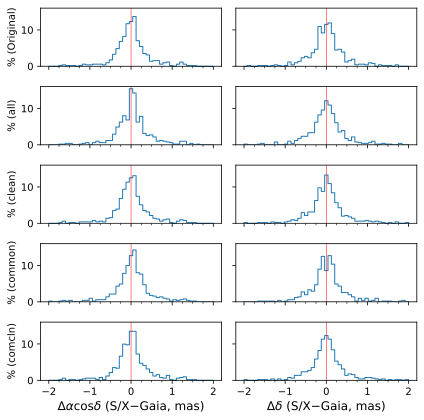

In [10]:
compare_pos_oft(pos_oft_sx, label="S/X$-$Gaia")

## 1.2 ICRF3 K versus Gaia EDR3

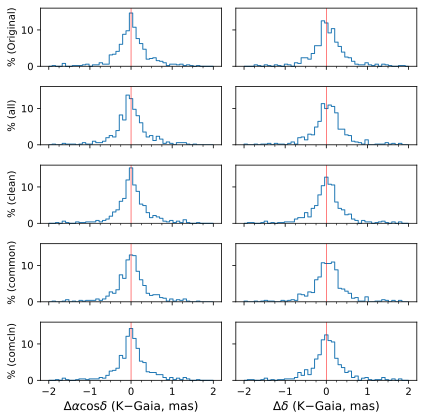

In [11]:
compare_pos_oft(pos_oft_k, label="K$-$Gaia")

## 1.3 ICRF3 X/Ka versus Gaia EDR3

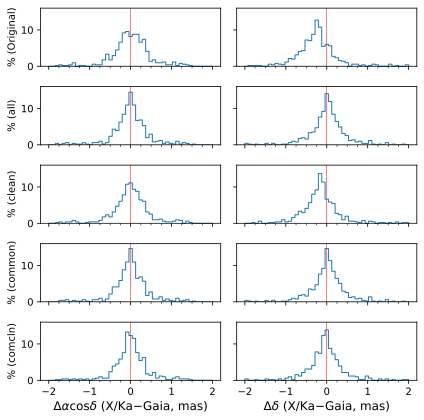

In [12]:
compare_pos_oft(pos_oft_xka, label="X/Ka$-$Gaia")

Then I compare the distribution of original offsets and those adjusted by the VSH parameters from the common clean sample.

In general, the adjustment of 16-parameters from all sources seems to remove the bias in $\Delta\alpha^*$ and $\delta$.

# 2. On the angular separation

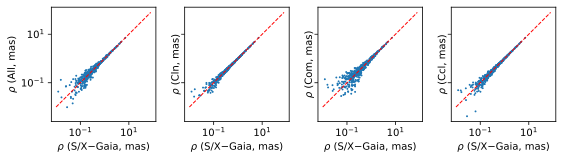

In [13]:
compare_pos_sep(pos_oft_sx, "ang_sep", "$\\rho$", "S/X$-$Gaia", [0.01, 20, 0.01, 20], "mas")

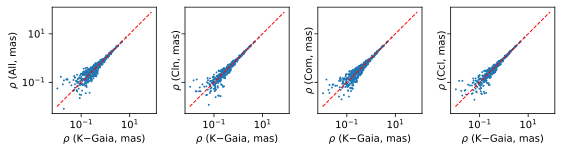

In [14]:
compare_pos_sep(pos_oft_k, "ang_sep", "$\\rho$", "K$-$Gaia", [0.01, 20, 0.01, 20], "mas")

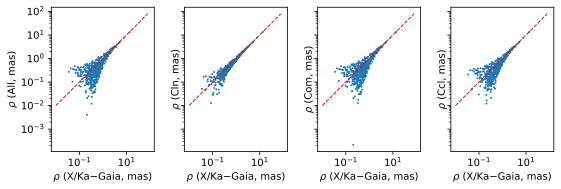

In [15]:
compare_pos_sep(pos_oft_xka, "ang_sep", "$\\rho$", "X/Ka$-$Gaia", [0.01, 20, 0.01, 20], "mas")

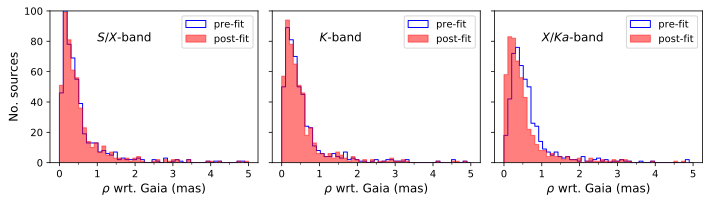

In [16]:
compare_pos_oft_4_4_bands(pos_oft_sx, pos_oft_k, pos_oft_xka, "ang_sep", "$\\rho$", 100, "mas")

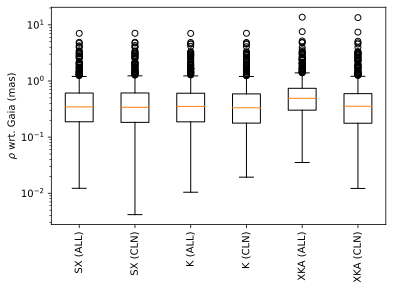

In [17]:
compare_pos_oft_in_boxplot(pos_oft_sx, pos_oft_k, pos_oft_xka, "ang_sep", "$\\rho$", "mas")

Different to the result that modeling of VSH parameters reduce the angular separation between SX and XKa band position, the Gaia-Ka distance is not affected significantly.
However, compared with the S/X- and K-band cases, the X/Ka-band position is still affect the most by the large-scale differences wrt. Gaia.

# 3. On normalized separation

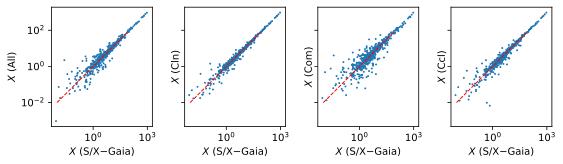

In [18]:
compare_pos_sep(pos_oft_sx, "nor_sep", "$X$", "S/X$-$Gaia", [0.03, 100, 0.03, 100])

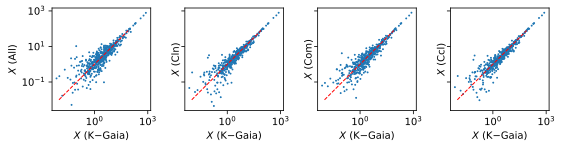

In [19]:
compare_pos_sep(pos_oft_k, "nor_sep", "$X$", "K$-$Gaia", [0.03, 100, 0.03, 100])

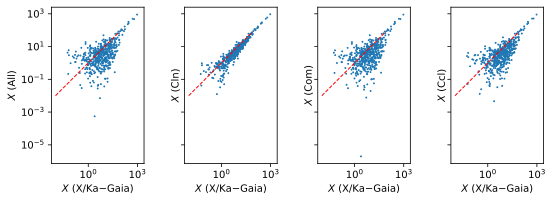

In [20]:
compare_pos_sep(pos_oft_xka, "nor_sep", "$X$", "X/Ka$-$Gaia", [0.03, 100, 0.03, 100])

In [21]:
compare_pos_oft_4_4_bands(pos_oft_sx, pos_oft_k, pos_oft_xka, "nor_sep", "$X$", 25, None, [1, 20], bins_set=np.linspace(0, 10, 50))

TypeError: compare_pos_oft_4_4_bands() got an unexpected keyword argument 'bins_set'

In [ ]:
compare_pos_oft_in_boxplot(pos_oft_sx, pos_oft_k, pos_oft_xka, "nor_sep", "$X$")

Modeling of VSH parameters reduce the normalized separation between Gaia and XKa band position.

# 4. On the positional offset orientation

In [ ]:
compare_oft_vec_pa(pos_oft_sx, "S/X$-$Gaia")

In [ ]:
compare_oft_vec_pa(pos_oft_k, "K$-$Gaia")

In [ ]:
compare_oft_vec_pa(pos_oft_xka, "X/Ka$-$Gaia")

In [ ]:
compare_oft_vec_pa_4_4_bands(pos_oft_sx, pos_oft_k, pos_oft_xka)

# What do we find?

- 1. The adjustment of VSH parameters of degree 2 does not remove the angular separation of 
Gaia-X/Ka position statistically significantly but reduce the normalized separations.

- 2. The adjustment of VSH parameters of degree 2 affect the PA of Gaia-Ka offset.